In [43]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
import src.soporte_logistica_preprocesamiento as pre


pd.set_option('display.float_format', '{:.2f}'.format)


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)


In [44]:
df_employee = pd.read_csv("../../datos/employee_survey_data.csv")
df_general = pd.read_csv("../../datos/general_data.csv")
df_manager = pd.read_csv("../../datos/manager_survey_data.csv")

In [45]:
df_employee.sample()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
1896,1897,1.00,2.00,2.00


In [46]:
df_general.sample()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1391,38,No,Travel_Rarely,Sales,4,4,Life Sciences,1,1392,Male,1,Manufacturing Director,Single,70820,1.00,Y,14,8,0,2.00,3,2,2,1


In [47]:
df_manager.sample()

,EmployeeID,JobInvolvement,PerformanceRating
370,371,3,3


# Sobre las tres tablas
- VR: Attrition (df_general)
- Las otras dos tablas son encuestas de satisfacción del empleado y el informe del manager sobre el rendimiento del mismo


In [48]:
df_general.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [49]:
df_employee.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [50]:
df_manager.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

# Merge
- Unimos las tres tablas por el id_empleado

In [51]:
df_unir = pd.merge(df_general, df_employee, on='EmployeeID', how='left')
df = pd.merge(df_unir,df_manager, on='EmployeeID', how="left")

In [52]:
df.sample()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
2094,36,No,Travel_Rarely,Sales,3,2,Marketing,1,2095,Male,4,Healthcare Representative,Divorced,178610,2.00,Y,18,8,0,17.00,2,7,7,7,3.00,1.00,3.00,2,3


In [53]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

# EDA inicial
- Veamos el df

In [54]:
visualizar = pre.Visualizador(df)

In [55]:
visualizar.exploracion_dataframe(df,"Attrition")

El número de datos es 4410 y el de columnas es 29

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
NumCompaniesWorked,0.43
TotalWorkingYears,0.20
EnvironmentSatisfaction,0.57
JobSatisfaction,0.45
WorkLifeBalance,0.86



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Age,int64
Attrition,object
BusinessTravel,object
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeID,int64
Gender,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna ATTRITION tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
Attrition,
No,3699
Yes,711


La columna BUSINESSTRAVEL tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
BusinessTravel,
Travel_Rarely,3129
Travel_Frequently,831
Non-Travel,450


La columna DEPARTMENT tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
Department,
Research & Development,2883
Sales,1338
Human Resources,189


La columna EDUCATIONFIELD tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


,count
EducationField,
Life Sciences,1818
Medical,1392
Marketing,477
Technical Degree,396
Other,246


La columna GENDER tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
Gender,
Male,2646
Female,1764


La columna JOBROLE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


,count
JobRole,
Sales Executive,978
Research Scientist,876
Laboratory Technician,777
Manufacturing Director,435
Healthcare Representative,393


La columna MARITALSTATUS tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
MaritalStatus,
Married,2019
Single,1410
Divorced,981


La columna OVER18 tiene los siguientes valores únicos:
Mostrando 1 categorías con más valores del total de 1 categorías (1/1)


,count
Over18,
Y,4410



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Age,4410.00,36.92,9.13,18.00,30.00,36.00,43.00,60.00
DistanceFromHome,4410.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,4410.00,2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,4410.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeID,4410.00,2205.50,1273.20,1.00,1103.25,2205.50,3307.75,4410.00
JobLevel,4410.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00
MonthlyIncome,4410.00,65029.31,47068.89,10090.00,29110.00,49190.00,83800.00,199990.00
NumCompaniesWorked,4391.00,2.69,2.50,0.00,1.00,2.00,4.00,9.00
PercentSalaryHike,4410.00,15.21,3.66,11.00,12.00,14.00,18.00,25.00
StandardHours,4410.00,8.00,0.00,8.00,8.00,8.00,8.00,8.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Attrition,4410,2,No,3699
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019
Over18,4410,1,Y,4410



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome 

None

# Conclusiones Iniciales
- Hay que reducir columnas
- No hay duplicados
- No hay demasiados datos nulos
- **La VR** presenta un Desbalanceo de datos (Muchos NO pocos YES)


# Visualizaciones y Reducciones Iniciales
- Eliminaremos las columnas que no presenten sentido tener
- Seremos poco estrictos, pues estamos ante el análisis inicial y aún no hemos visto que representan

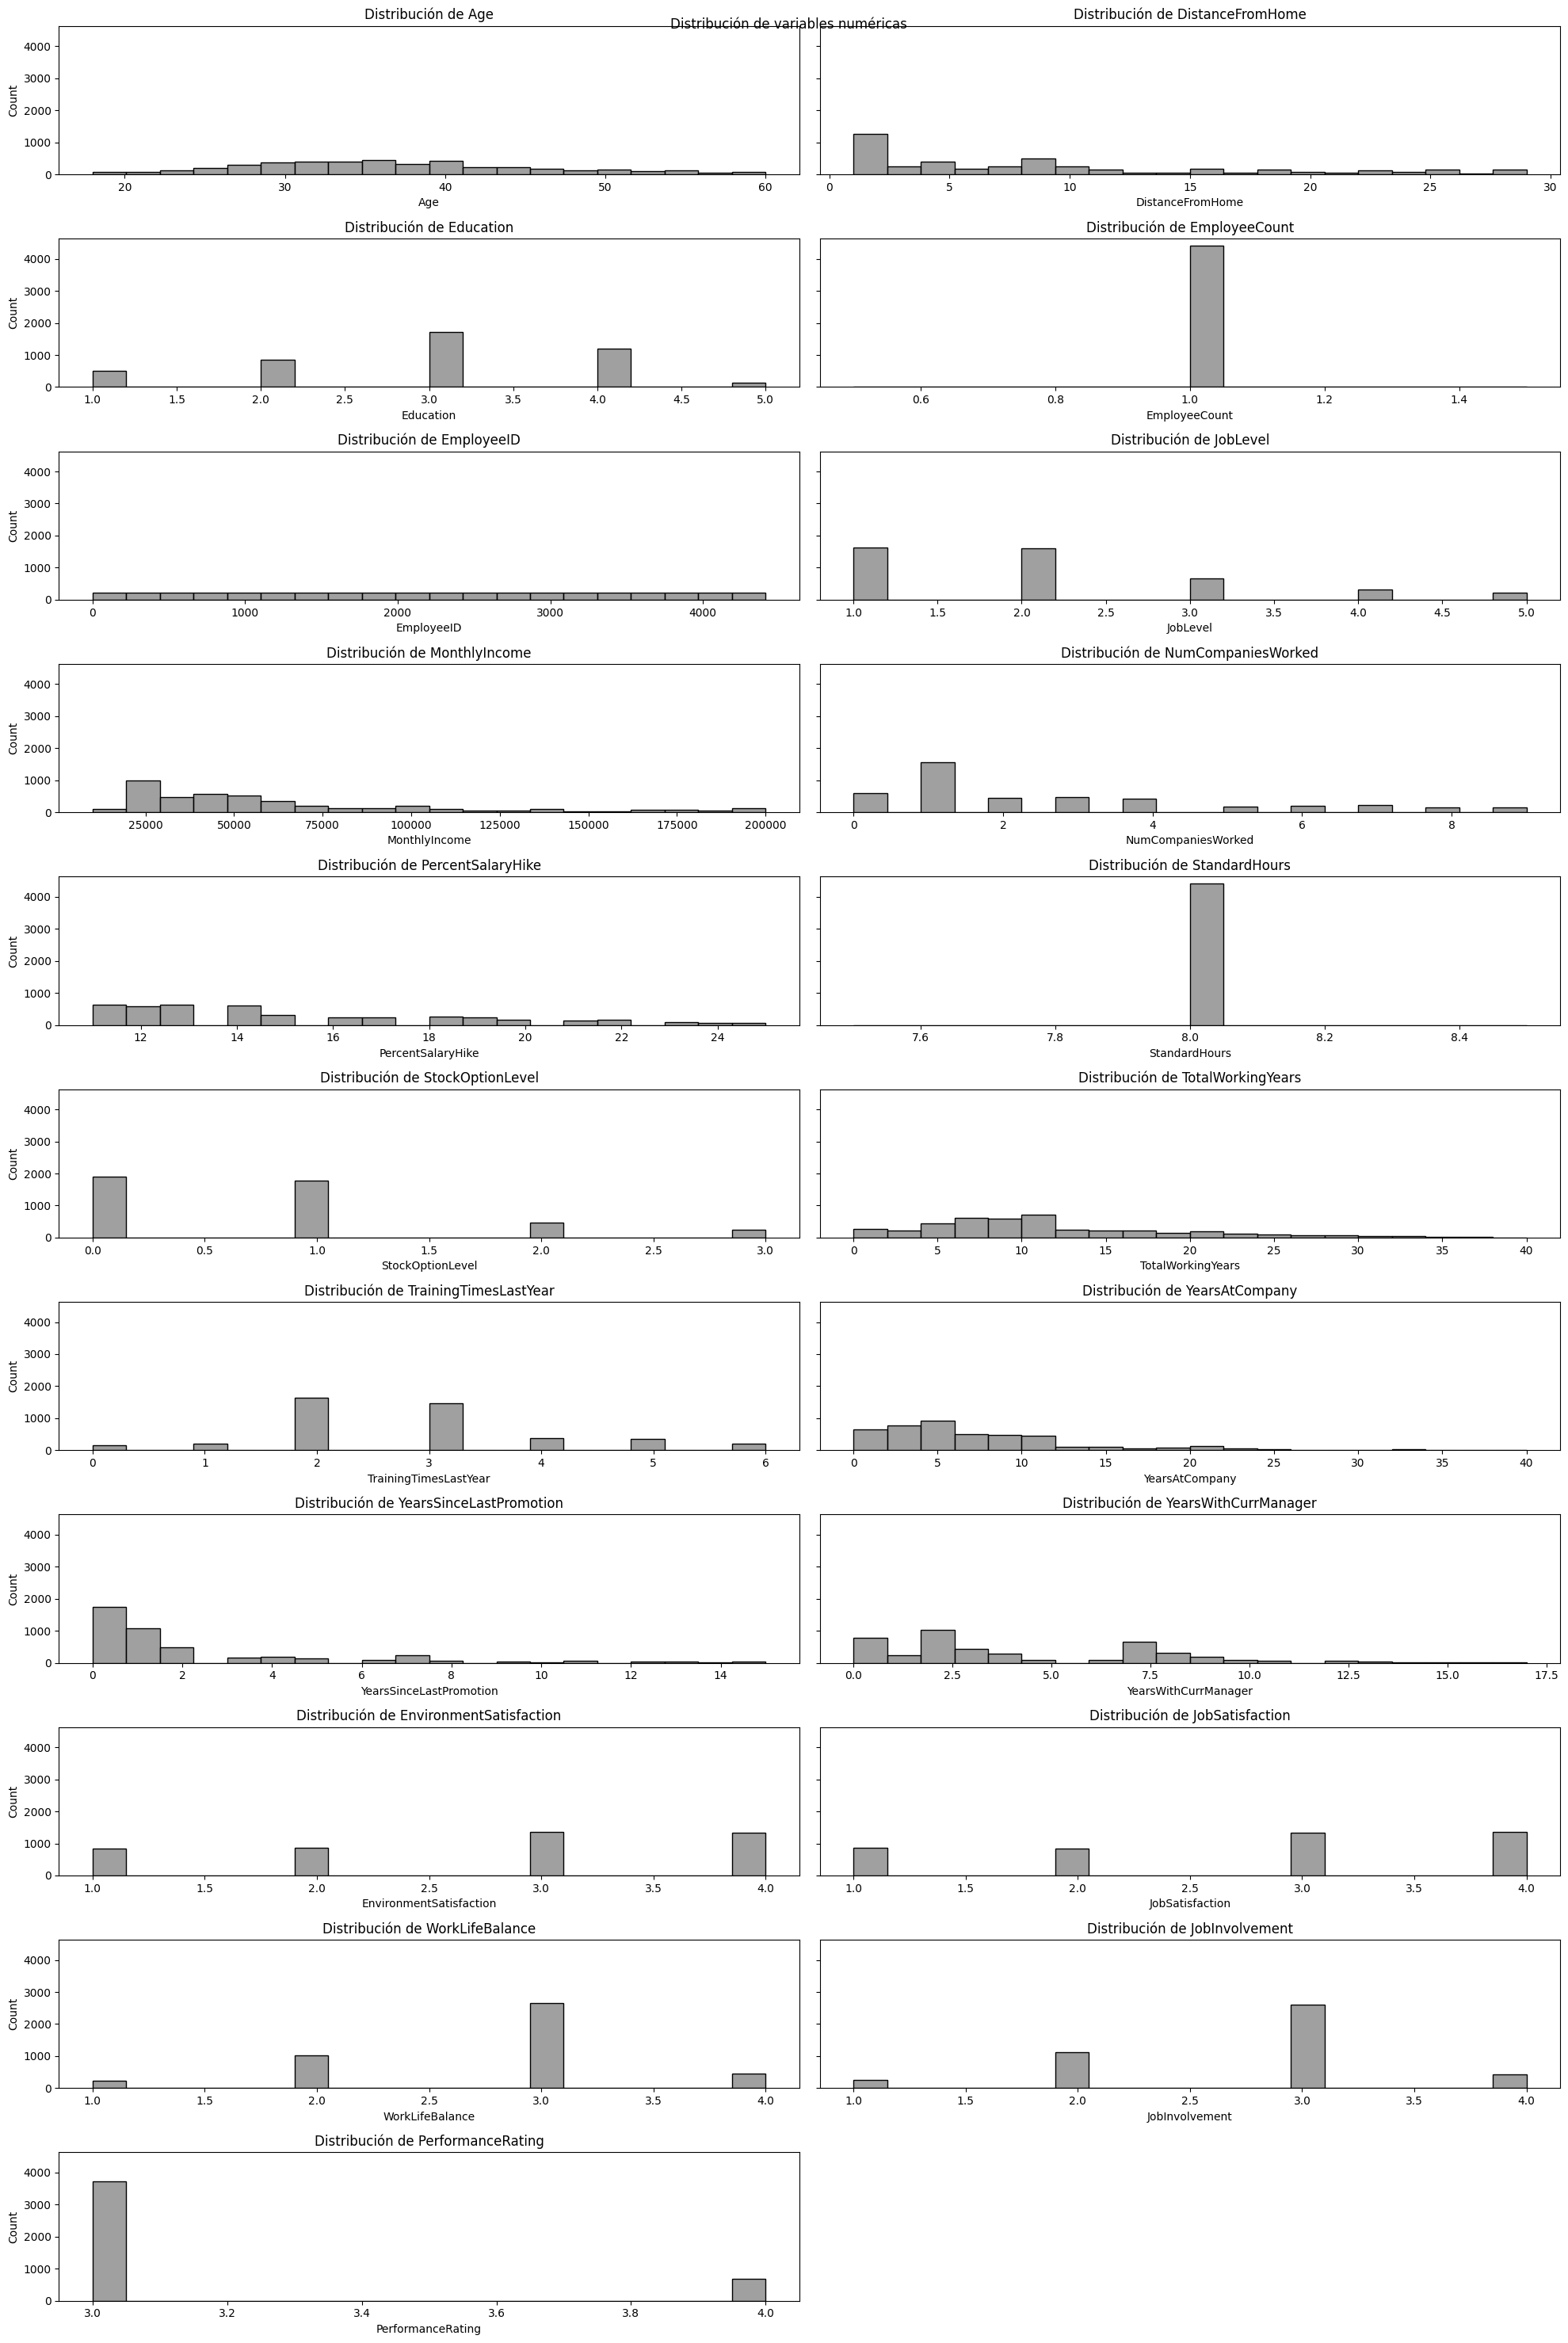

In [56]:
visualizar.plot_numericas(tamano_grafica=(20,30))

In [57]:
df["StandardHours"].value_counts()

StandardHours
8    4410
Name: count, dtype: int64

In [58]:
print(df["PerformanceRating"].isnull().sum())
len(df["PerformanceRating"].unique())

0


2

# Conclusiones de la Visualización:
- DistanceFromHome: Es una categoría de 29 opciones
- Education: Es categoría de 5 opciones
- EmployeeCount: Podemos eliminarla (solo un valor)
- JobLevel: Categoría de 5 opciones
- NumCompaniesWorked: Categórica de 11 opciones (19 Nulos), con nulos no hacemos nada aún.
- PercentSalaryHike: Categoría de 15 opciones
- StandardHours: Podemos Eliminarla (solo un valor)
- StockOptionLevel: Categoría de 4 opciones
- TrainingTimesLastYear: Categoría de 7 opciones
- EnvironmentSatisfaction: Categoría de 5 opciones (25 nulos)
- JobSatisfaction: Categoría de 5 opciones (20 nulos)
- WorkLifeBalance: Categoría de 5 opciones (38 nulos)
- JobInvolvement: Categoría de 4 opciones

- PerformanceRating: Categoría de 2 opciones

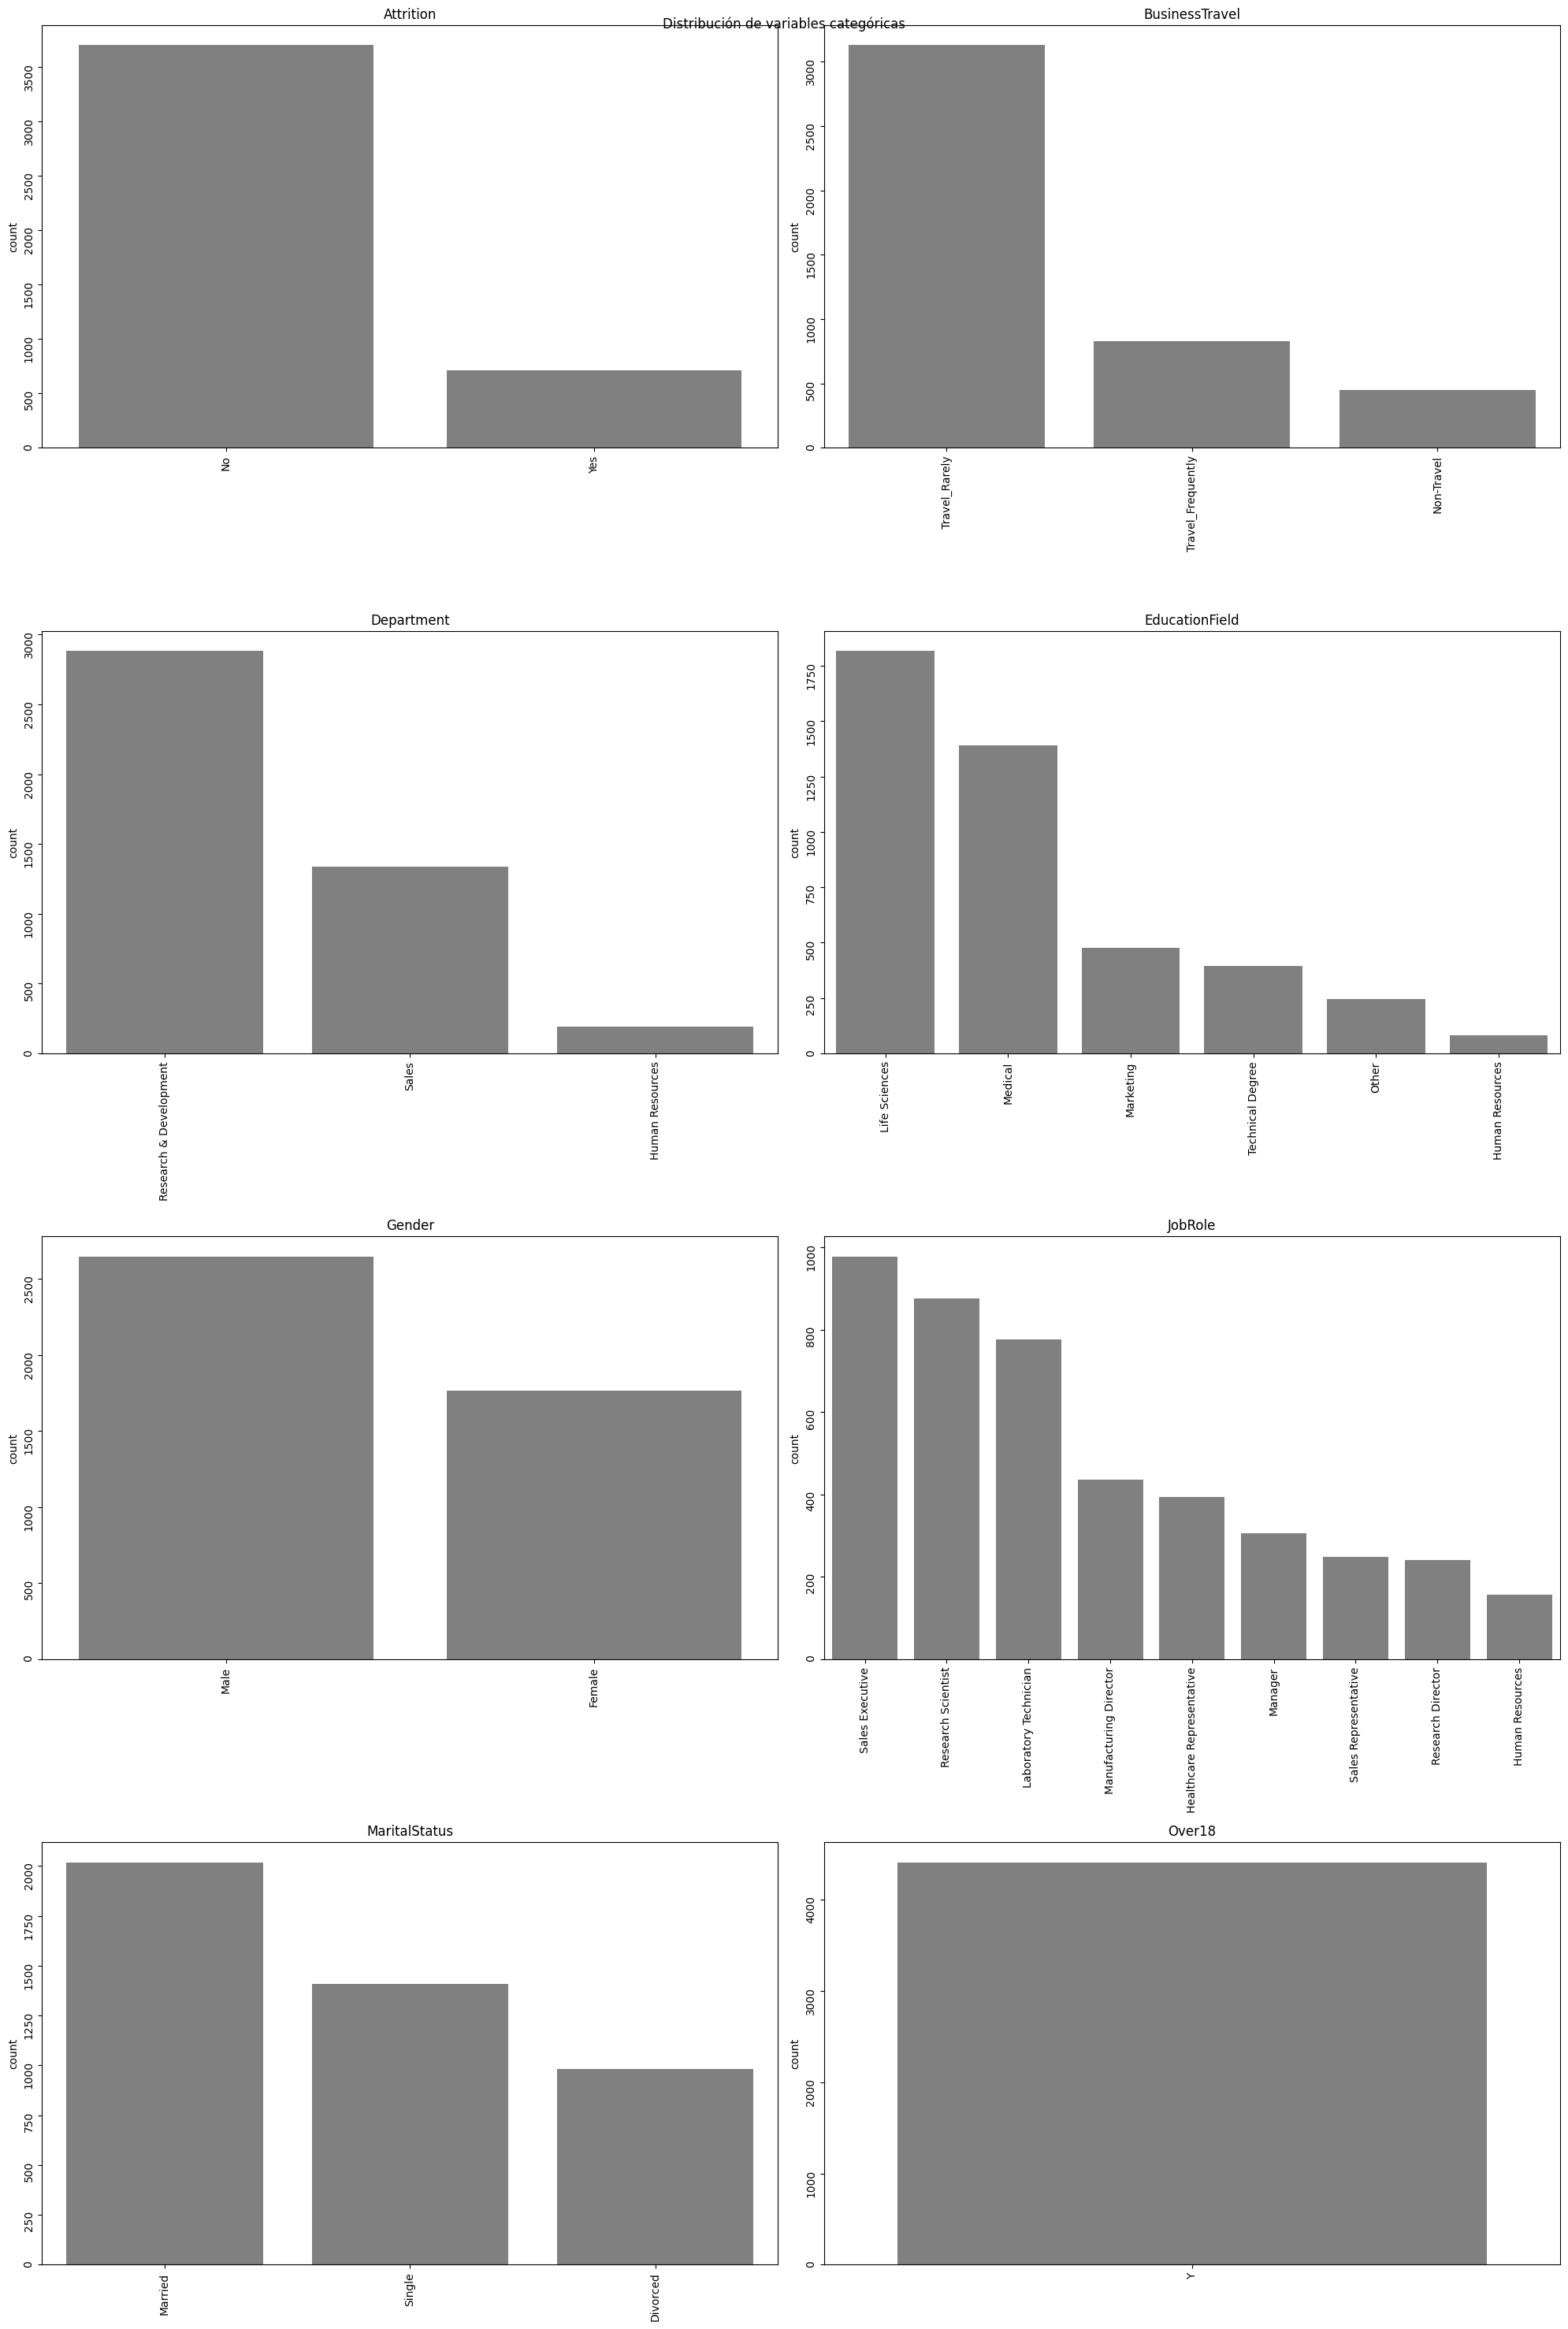

In [59]:
visualizar.plot_categoricas(tamano_grafica=(20,30))

# Conclusiones Categóricas
- Over18 eliminamos

# Outliers

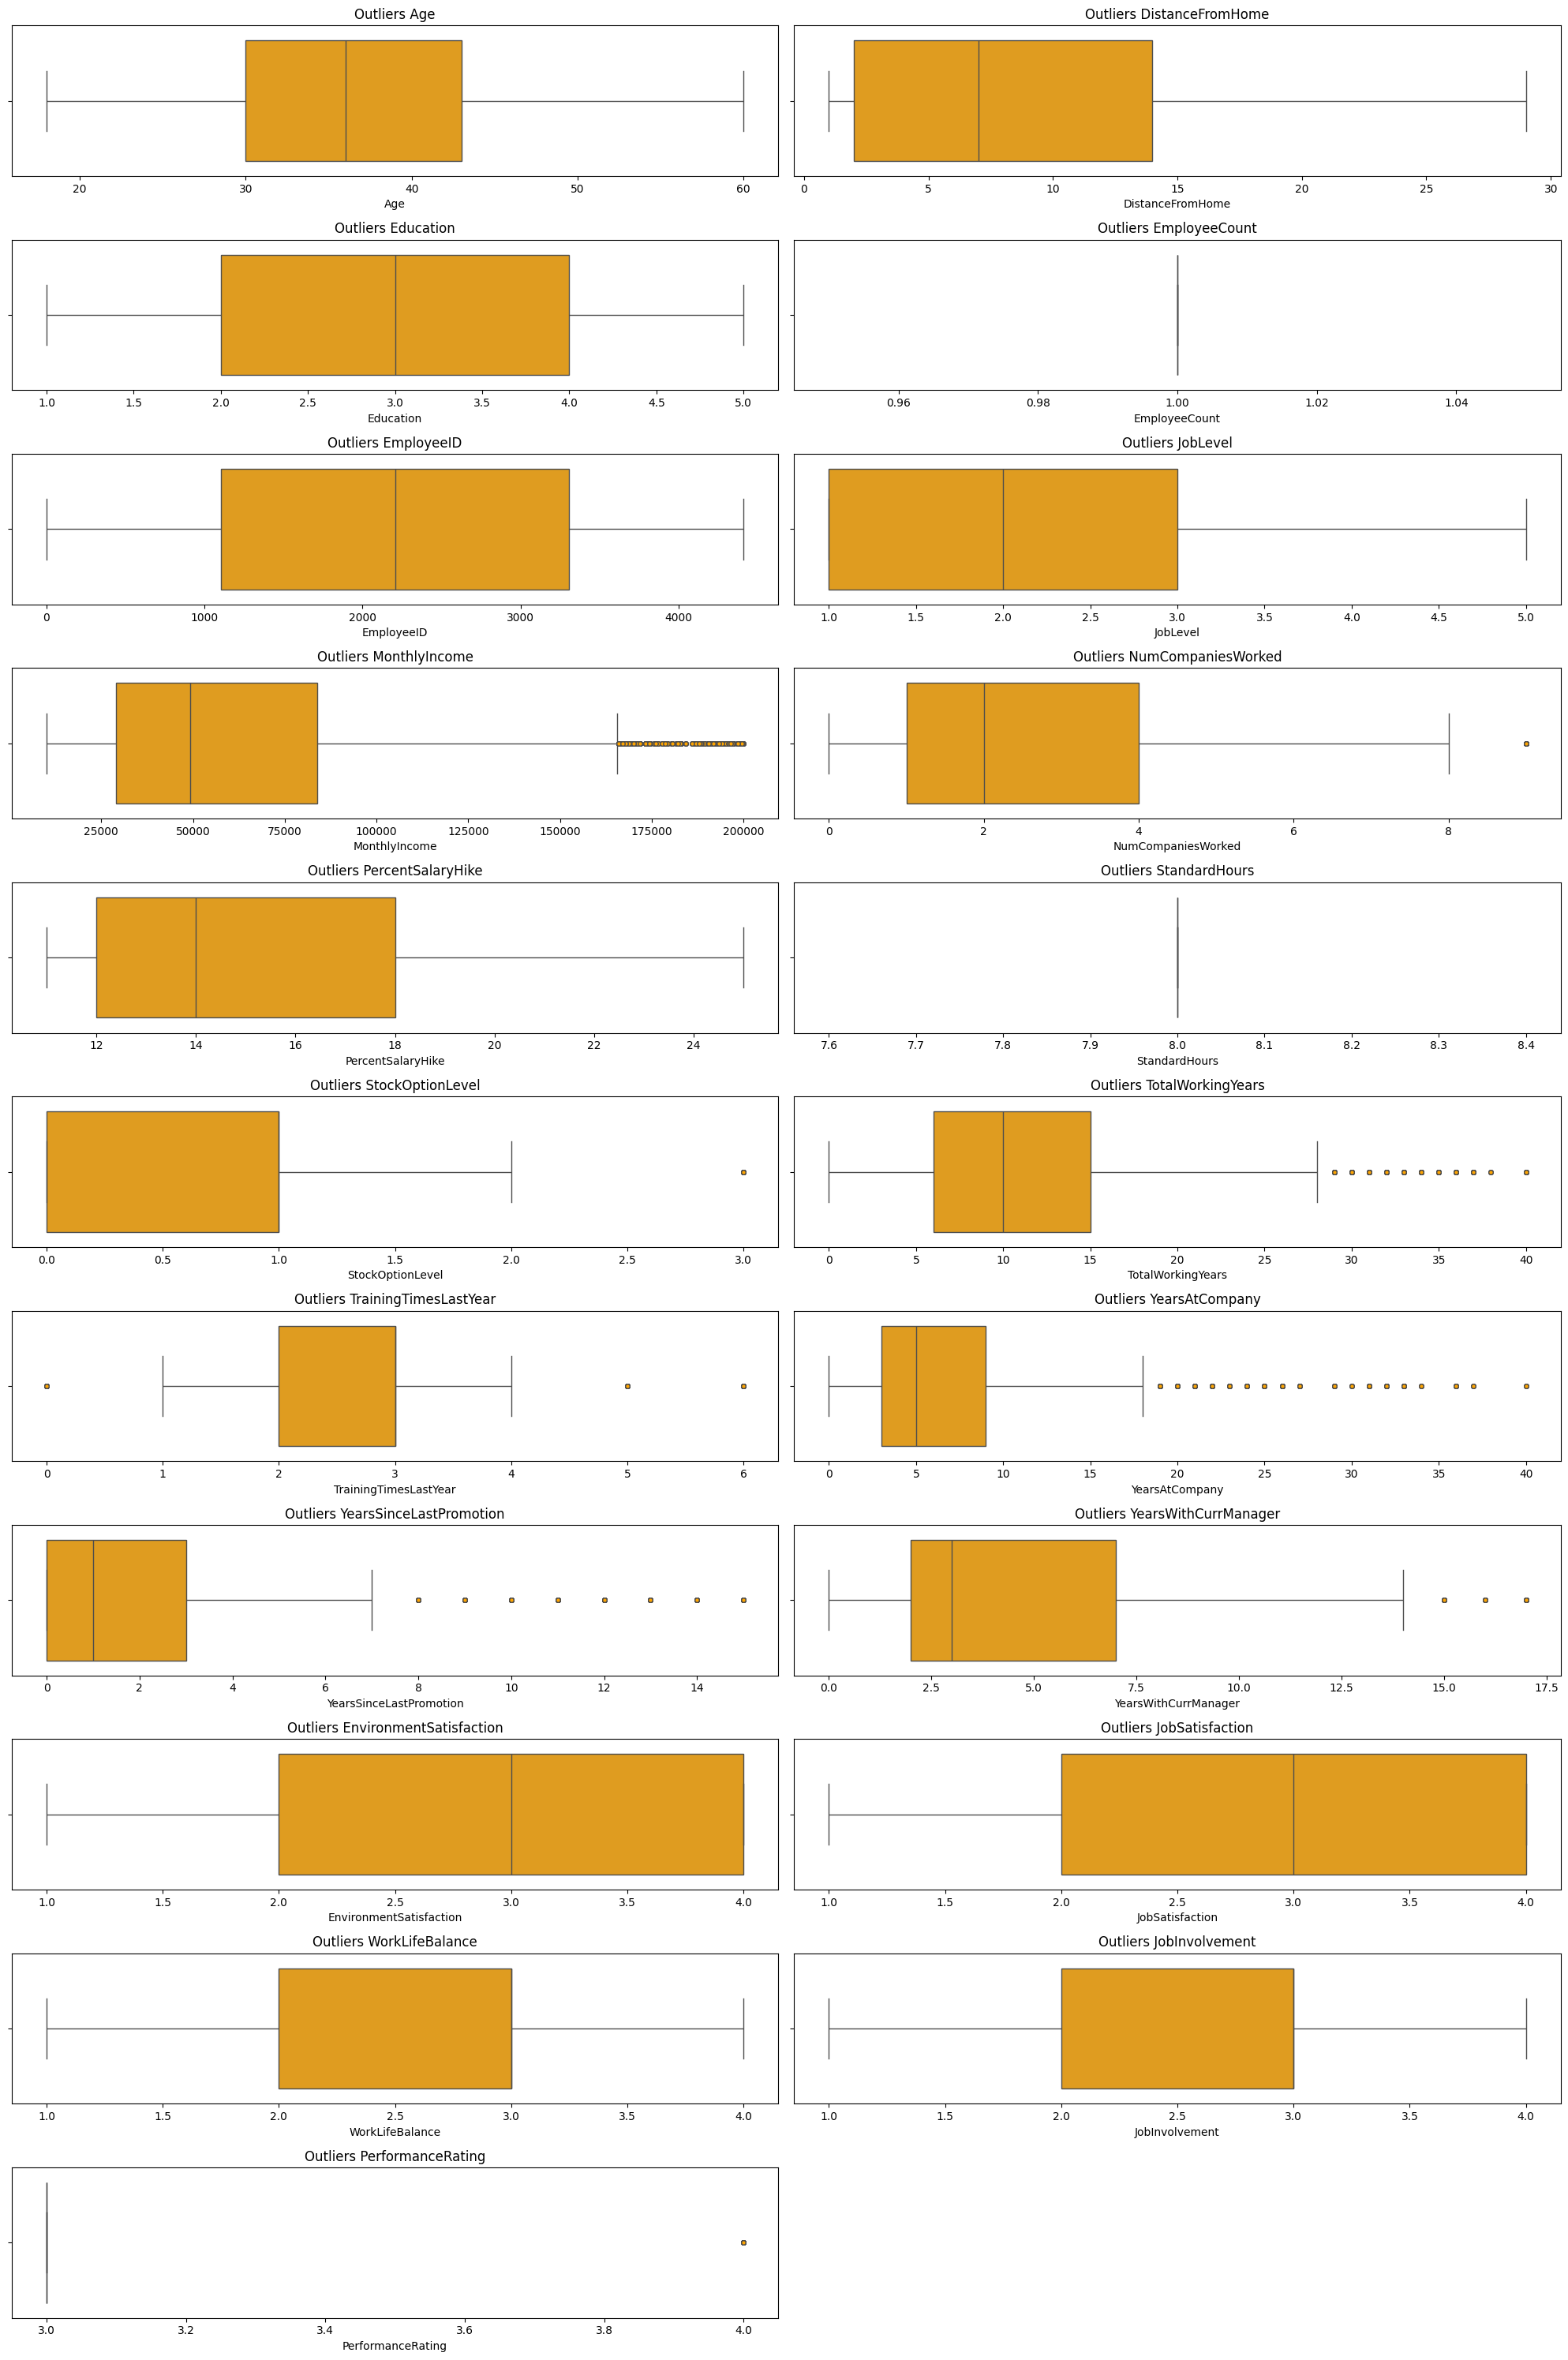

In [60]:
# detectamos los outliers
visualizar.deteccion_outliers(color = "orange",tamano_grafica=(20,30))

# Conclusiones
Outliers en:
- MonthlyIncome 
- NumCompaniesWorked
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsSinceLastPromotion
- YearsWithCurrManager
- PerformanceRating

# Correlación

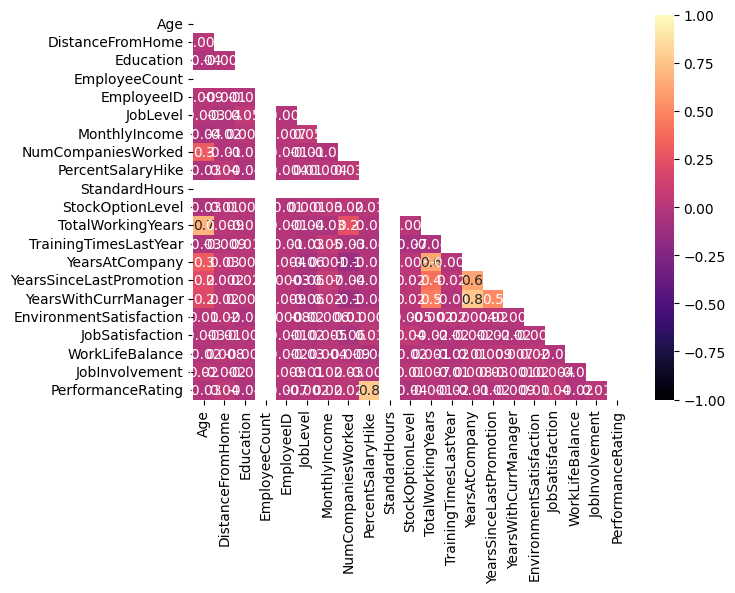

In [61]:
# evaluamos las correlaciones entre las variables numéricas
visualizar.correlacion()

 Mejor la hacemos luego

# Relacion entre variables numéricas

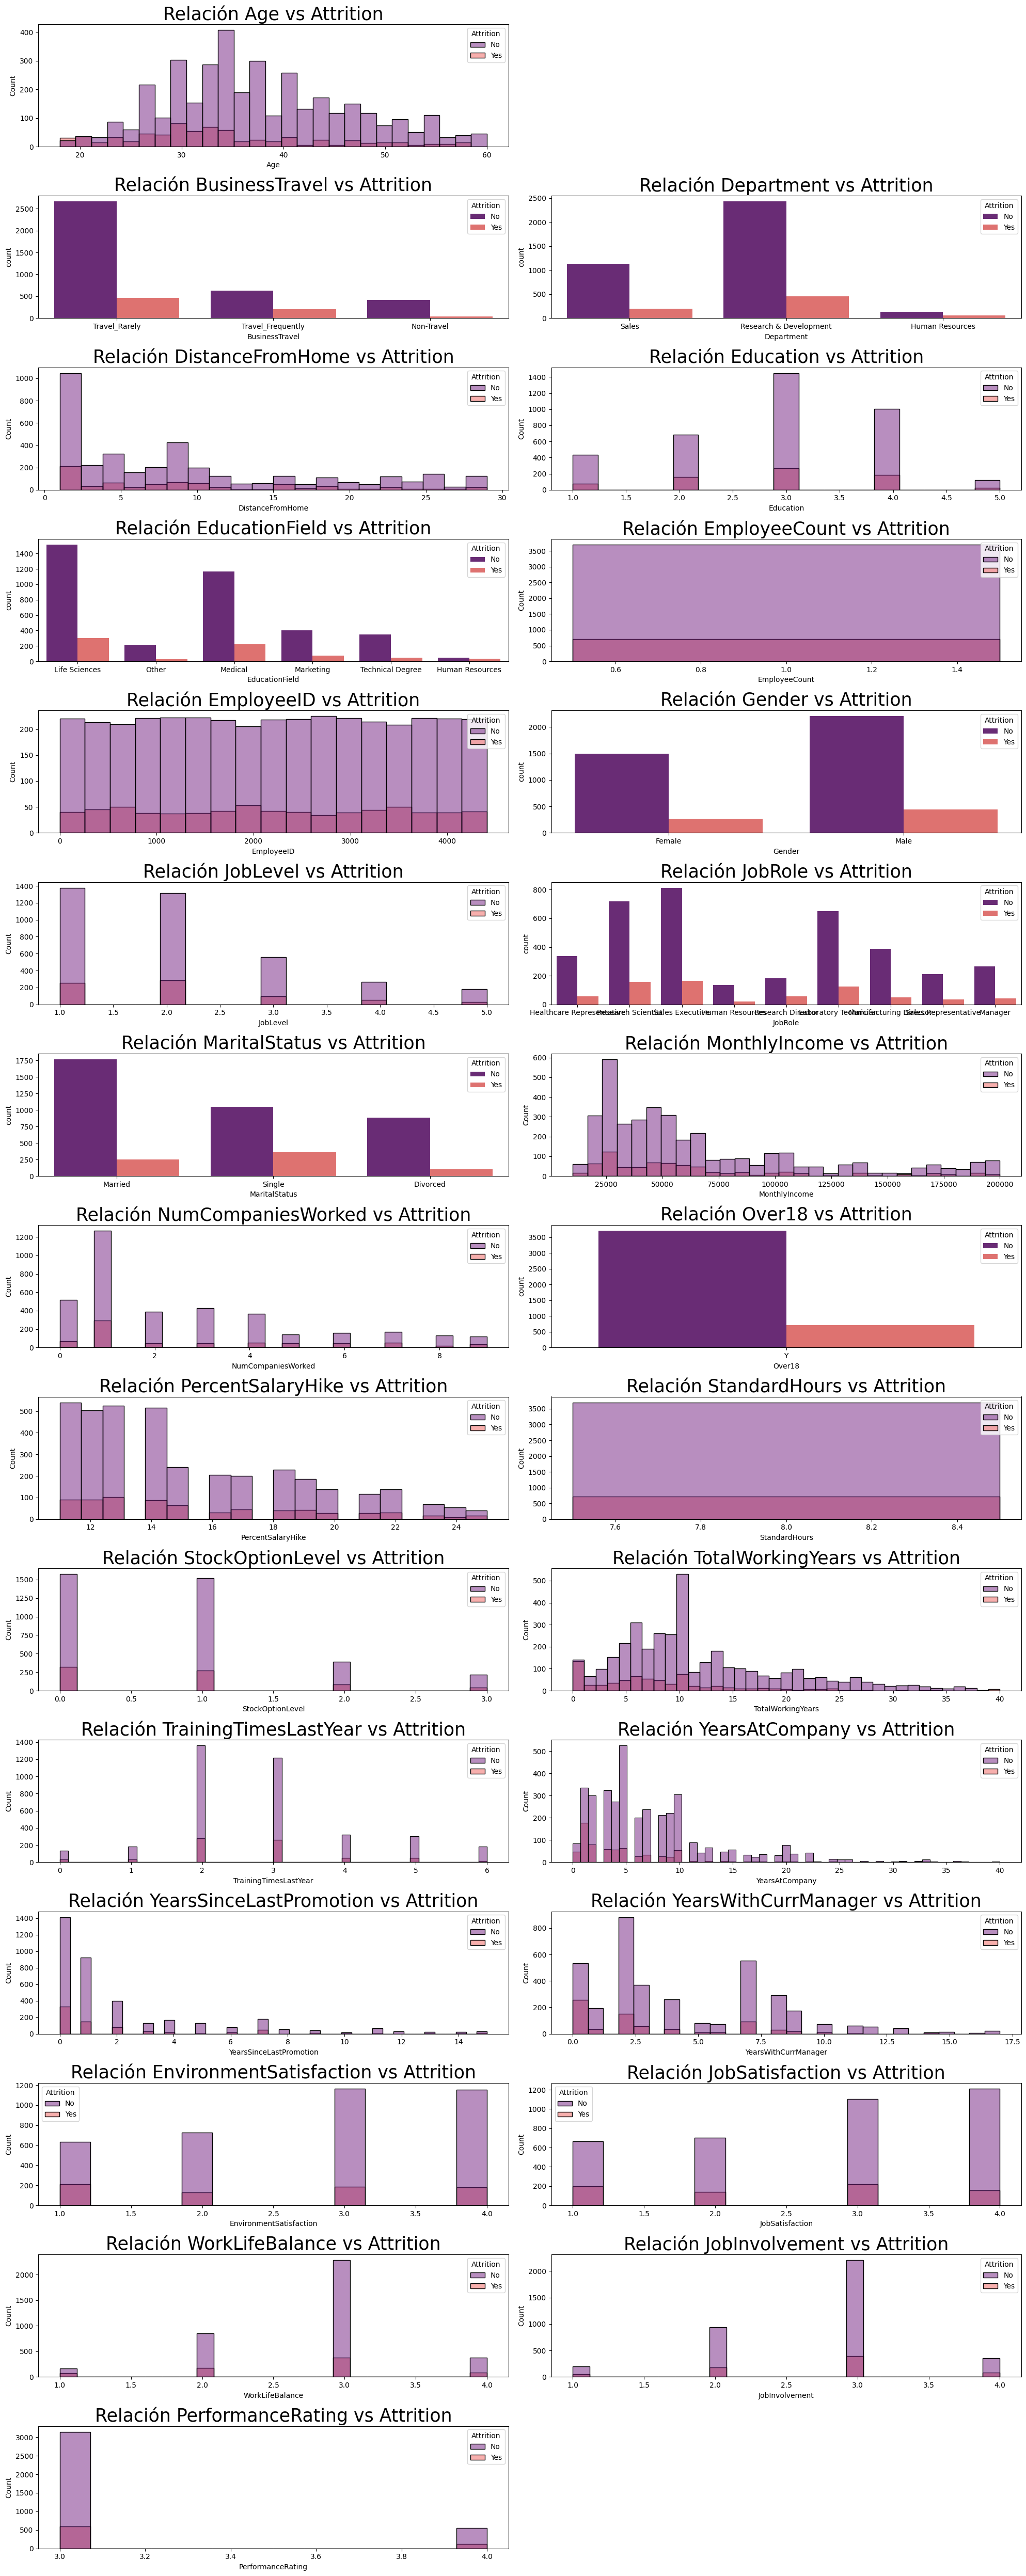

In [62]:
visualizar.plot_relacion("Attrition",tamano_grafica=(20,50))

# Guardar DF


In [63]:
df.to_pickle("../../datos/01_datos_merge.plk")